In [1]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xzf 102flowers.tgz
!rm 102flowers.tgz
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2022-05-02 06:55:57--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz [following]
--2022-05-02 06:55:57--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  29.5MB/s    in 12s     

2022-05-02 06:56:10 (27.2 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2022-05-02 06:56:14--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.

In [2]:
import scipy.io
img_labels = scipy.io.loadmat("imagelabels.mat")
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

In [3]:
import os
import cv2
images = list()
labels = list()
dir = "jpg/"
for imgs in os.listdir(dir):
  img_num = int(imgs[7:11])-1
  labels.append(img_labels[img_num])
  image = cv2.imread(os.path.join(dir, imgs))
  resized = cv2.resize(image, (70,70))
  images.append(resized)

In [4]:
for i in range(0,len(labels)):
  labels[i]=int(labels[i])

In [5]:
from collections import Counter
new_label = Counter(labels)
ind = list()
for i in range(len(new_label)):
  if(new_label[i]>=100):
    ind.append(i)

In [6]:
IMG = list()
LAB = list()
i=0
while(i<102):
  # extracting data of each class separately
  l=list()
  p=list()
  for j in range(0,len(labels)):
    if(labels[j]==i):
      l.append(images[j])
      p.append(labels[j])
  IMG.append(l)
  LAB.append(p)
  i+=1

In [7]:
lab=list()
c_ind=0
p=0
for i in ind:
  c_ind+=1
  for j in LAB[i]:
    lab.append(p)
  p+=1
img1=list()
c_ind=0
for i in ind:
  c_ind+=1
  for j in  IMG[i]:
    img1.append(j)


Data Augmentation code

In [8]:
import sys, cv2, glob, os, time
import pandas as pd 
import numpy as np
#from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten,Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from tensorflow import keras

import matplotlib.pyplot as plt

%matplotlib inline

do not run

In [9]:
from sklearn.model_selection import train_test_split
train_temp_x, test_x, train_temp_y, test_y = train_test_split(img1,lab,stratify=lab, test_size=0.2,random_state=1)

In [10]:
train_x = (np.asarray(train_temp_x))/255
test_x = (np.asarray(test_x))/255

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
new_model = VGG16(weights="imagenet", include_top=False, input_shape=train_x[0].shape)
new_model.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [12]:
from keras.utils import np_utils

train_y=np.asarray(train_temp_y)    
train_y = np_utils.to_categorical(train_y,num_classes=23)

test_y=np.asarray(test_y)  
test_y= np_utils.to_categorical(test_y,num_classes=23)


In [13]:
from tensorflow.keras import layers, models
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(120, activation='relu')
dense_layer_2 = layers.Dense(100, activation='relu')
dense_layer_3 = layers.Dense(80, activation='relu')
dense_layer_4 = layers.Dense(60, activation='relu')
prediction_layer = layers.Dense(23, activation='softmax')



new_model_ = models.Sequential([
    new_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
    prediction_layer
])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.0001)
new_model_.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_acc', mode='max', patience=5,  restore_best_weights=True)


do not run just for reference

In [15]:
import tensorflow as tf

In [16]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=True, 
    featurewise_std_normalization=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2 )

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(train_x)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


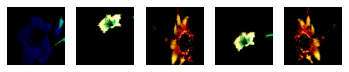

In [17]:

from matplotlib import pyplot as plt

gen = datagen.flow(train_x[1:4], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()


In [18]:
np.asarray(train_x).shape

(2700, 70, 70, 3)

In [19]:
data_augmentation_model=new_model_.fit(datagen.flow(train_x, train_y, batch_size=32),validation_data=datagen.flow(train_x, train_y, batch_size=8),
	steps_per_epoch=len(train_x) // 32,epochs=50,callbacks=[es])#(train_x, train_y, epochs=50,steps_per_epoch=30, validation_split=0.2, batch_size=30, callbacks=[es])

Epoch 1/50
84/84 [==============================] - 257s 3s/step - loss: 3.1012 - accuracy: 0.0806 - val_loss: 3.0300 - val_accuracy: 0.1500
Epoch 2/50
84/84 [==============================] - 256s 3s/step - loss: 2.9261 - accuracy: 0.1885 - val_loss: 2.7733 - val_accuracy: 0.2256
Epoch 3/50
84/84 [==============================] - 256s 3s/step - loss: 2.5985 - accuracy: 0.2766 - val_loss: 2.4078 - val_accuracy: 0.3581
Epoch 4/50
84/84 [==============================] - 257s 3s/step - loss: 2.2084 - accuracy: 0.3936 - val_loss: 2.0269 - val_accuracy: 0.4274
Epoch 5/50
84/84 [==============================] - 256s 3s/step - loss: 1.8829 - accuracy: 0.4843 - val_loss: 1.7525 - val_accuracy: 0.5274
Epoch 6/50
84/84 [==============================] - 256s 3s/step - loss: 1.6638 - accuracy: 0.5360 - val_loss: 1.5858 - val_accuracy: 0.5515
Epoch 7/50
84/84 [==============================] - 256s 3s/step - loss: 1.5257 - accuracy: 0.5596 - val_loss: 1.4407 - val_accuracy: 0.6033
Epoch 8/50
84

In [22]:
new_model_.evaluate(test_x,test_y)

22/22 [==============================] - 31s 1s/step - loss: 1.8041 - accuracy: 0.4607


[1.8040653467178345, 0.46074074506759644]

In [25]:
y_predict = new_model_.predict(test_x)
predicted_classes = np.argmax(np.round(y_predict),axis=1)

In [26]:
y_true = np.argmax(np.round(test_y),axis=1)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, predicted_classes))

0.3496296296296296


In [27]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(23)]
y=np.argmax(np.round(test_y),axis=1)
print(classification_report(y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.06      0.95      0.12        22
     Class 1       0.94      0.64      0.76        25
     Class 2       0.83      0.19      0.31        26
     Class 3       0.80      0.10      0.18        39
     Class 4       0.60      0.35      0.44        52
     Class 5       1.00      0.14      0.24        22
     Class 6       0.00      0.00      0.00        23
     Class 7       0.00      0.00      0.00        22
     Class 8       0.38      0.90      0.54        20
     Class 9       0.92      0.28      0.43        39
    Class 10       0.67      0.29      0.41        34
    Class 11       0.30      0.54      0.38        24
    Class 12       0.81      0.62      0.70        21
    Class 13       0.86      0.64      0.74        50
    Class 14       0.50      0.04      0.07        27
    Class 15       0.58      0.86      0.69        21
    Class 16       0.96      0.67      0.79        33
    Class 17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

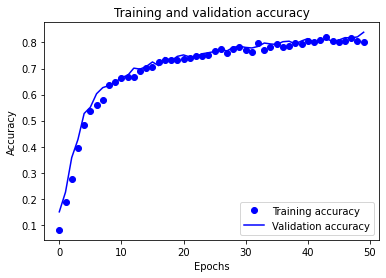

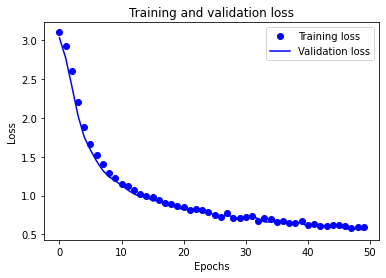

<Figure size 432x288 with 0 Axes>

In [28]:
accuracy = data_augmentation_model.history['accuracy']
val_accuracy = data_augmentation_model.history['val_accuracy']
loss = data_augmentation_model.history['loss']
val_loss = data_augmentation_model.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and validation loss')
plt.legend()
plt.figure()